# 1.导库，获取数据

In [13]:
import scorecardpy
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [14]:
data = pd.read_csv('./data/rankingcard.csv',index_col = 0)

In [15]:
data.shape

(150000, 11)

In [16]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 2.探索数据与数据预处理

## 2.1去除重复值

In [17]:
#去除重复值
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtypes: fl

In [18]:
#删除之后一定是要恢复索引
data.reset_index(drop=True,inplace=True)
#data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [19]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2 填补缺失值

In [20]:
#均值填补
#data.isna().sum()/data.shape[0]
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [21]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()),inplace=True)

In [22]:
data.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [23]:
#随机森林
#填补函数
def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    :param x: 要填补的特征矩阵
    :param y: 完整的，没有缺失值的标签（原有标签）
    :param to_fill: 要填补的特征
    :return: 缺失填补后的特征
    """
    #构建新特征矩阵和标签
    df = x.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)

    #找出训练集和测试集
    y_train = fill[fill.notnull()]
    y_test  = fill[fill.isnull()]
    x_train = df.iloc[y_train.index,:]
    x_test = df.iloc[y_test.index,:]

    #使用随机森林填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr.fit(x_train,y_train)
    yprdict = rfr.predict(x_test)

    return yprdict

In [26]:
x = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']
ypredict = fill_missing_rf(x,y,'MonthlyIncome')

In [28]:
#确认结果合理，就将数据覆盖
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = ypredict

In [29]:
data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

## 2.3描述性统计处理异常值

In [78]:
df_describe = data.describe([0.01,0.1,0.25,.5,.75,.9]).T

In [40]:
(data['age']==0).sum()
data = data[data['age']!=0]
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [41]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

## 2.5样本不均衡问题

In [61]:
#标签分布
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()
n_sample = x.shape[0]
n1_sample = y.value_counts()[1]
n0_sample = y.value_counts()[0]
print(f'样本个数:%d;\n1占%.2f%%;\n0占%.2f%%'%(n_sample,n1_sample*100/n_sample,n0_sample*100/n_sample))
#print('样本个数:{:d};\n1占{:.2%};\n0占{:.2%}'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本个数:149165;
1占6.62%;
0占93.38%


In [73]:
#上采样 方法平衡样本【不断向上采样平衡样本】
#重复采样样本量少的部分，以数据量多的一方的样本数量为标准，把样本数量较少的类的样本数量生成和样本数量多的一方相同

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)#实例化
x,y = sm.fit_resample(x,y) #返回已经上采样完毕后的特征矩阵和标签
n_sample = x.shape[0]
pd.Series(y).value_counts()
n1_sample = pd.Series(y).value_counts()[1]
n0_sample = pd.Series(y).value_counts()[0]
print('样本总数为{:d};\n1占{:.2%};\n2占{:.2%}\n'.format(n_sample,n1_sample/n_sample,n0_sample/n_sample))

样本总数为278584;
1占50.00%;
2占50.00%



# 3 特征筛选

## 3.1 方差为0的特征删除

In [79]:
df_describe

,count,mean,std,min,1%,10%,25%,50%,75%,90%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,329664.0
MonthlyIncome,149165.0,5429.576970,13261.276410,0.0,0.0,0.180000,1800.000000,4433.000000,7418.000000,10800.00000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,11.0


In [111]:
varnum = [x for x in df_describe[df_describe["std"] !=0].index]

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [112]:
data = data[varnum[1:]]

## 3.2 相关性剔除；剔除规则iv较小

<Axes: >

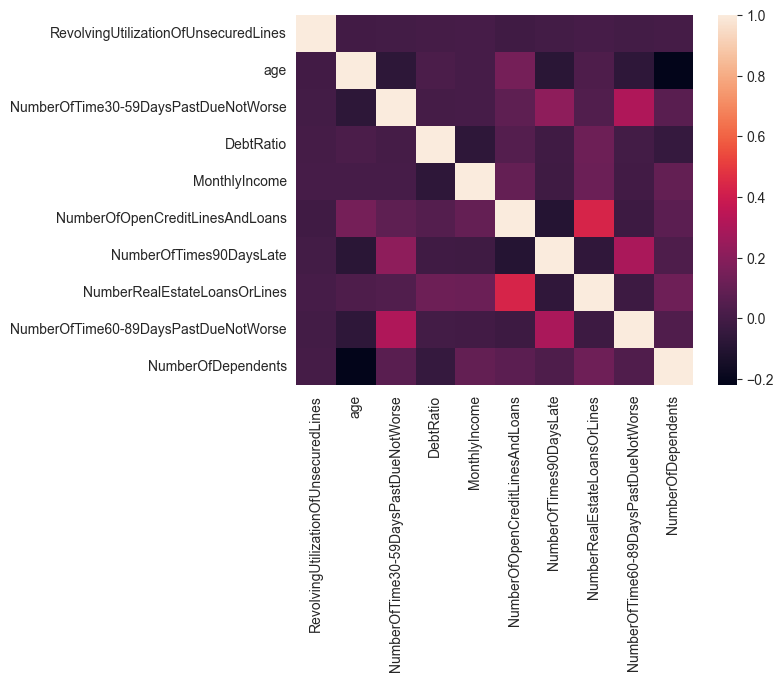

In [113]:
import seaborn as sns
import scorecardpy as sc
sns.heatmap(data.corr())

In [116]:
#剔除两两相关变量中iv较低者
def get_sc_iv(df_num,features,label='SeriousDlqin2yrs',bin_num_limit =10,method ='chimerge'):
    """
    输入：
    df_num:特征矩阵
    features:特征名称
    label：标签名称
    bin_num_limit :分箱箱数限制
    method:方法
    输出：
    return woe_bins
    """
    exclude_cols = [label]
    iv_dict = {}
    i = 0
    for col in features:
        try:
            i += 1
            bins = sc.woebin(df_num[[col,label]],y = label,bin_num_limit=bin_num_limit,method=method)
            print(i)
            iv_dict[col] = bins
        except:
            print(col)
    woe_bins = pd.DataFrame()
    for key in iv_dict:
        woe_bins = woe_bins.append(iv_dict[key])
    woe_bins = woe_bins[~woe_bins['variable'].isin(exclude_cols)].rename(columns = {'variable':'cols'})
    return woe_bins

In [120]:
sc_iv = get_sc_iv(data[varnum[1:]],varnum[1:],label = 'SeriousDlqin2yrs')

RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


KeyError: 'variable'

In [118]:
for col in varnum:
    print(col)

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents
